<div style="text-align: right">ADEC7430 Lecture 2</div>
<div style="text-align: right">Prof. Stefano Parravano, 09/02/2025</div>

In [1]:
import random
from sympy import *
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def generate_data (var1):
    
    b1 = 2.5
    b0 = 80
    
    random_lower_bound = -60.8
    random_upper_bound = 60.8
    
    error = random.uniform(random_lower_bound,random_upper_bound)
    
    return b0 + b1 * var1 + error
        
x_1 = [x for x in range(0,400)]    
y_vals = []
for x in range(len(x_1)):
    temp = generate_data(x_1[x])
    y_vals.append(temp)
    
data = pd.DataFrame({'x1':x_1,'y':y_vals})


In [13]:
data

,x1,y
0,0,37.382908
1,1,86.724150
2,2,29.000505
3,3,75.489211
4,4,122.848066
...,...,...
395,395,1026.682939
396,396,1064.031672
397,397,1022.256241
398,398,1037.046920


In [3]:

def perform_ols_regression(x1_vec,y_vec):
    const_ = [1 for x in range(len(x1_vec))]
    X = Matrix([const_,x1_vec]).T
    y = Matrix(y_vec)
    beta_hat = ((X.T*X).inv())*(X.T)*y
    return beta_hat,X    

In [4]:
#generate sample from population
random_idx_sample = random.sample(range(0, len(x_1)), 100)
x_1_sample = [x_1[i] for i in random_idx_sample]
y_sample = [y_vals[i] for i in random_idx_sample]
sample_df = pd.DataFrame({'x1':x_1_sample,'y':y_sample})
#compute beta_hat for sample
beta_hat,X = perform_ols_regression(sample_df['x1'],sample_df['y'])
print(f'beta_0 estimate: {beta_hat[0]}, beta_1_estimate: {beta_hat[1]}')
#compute beta_hat for population
beta_hat_pop,X_pop = perform_ols_regression(x_1,y_vals)
print(f'population beta_0: {beta_hat_pop[0]},population beta_1: {beta_hat_pop[1]}')

beta_0 estimate: 78.4497501875085, beta_1_estimate: 2.49473360723058
population beta_0: 84.3415525022566,population beta_1: 2.47751893388657


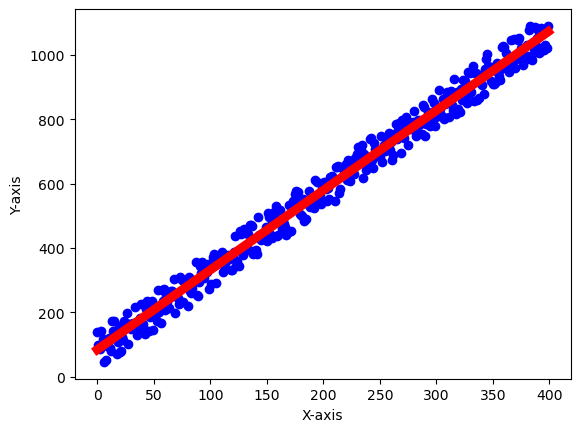

In [10]:
plt.scatter(x_1, y_vals, c ="blue")
plt.plot(x_1,X_pop@beta_hat_pop , c ="red",linewidth=6.5)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

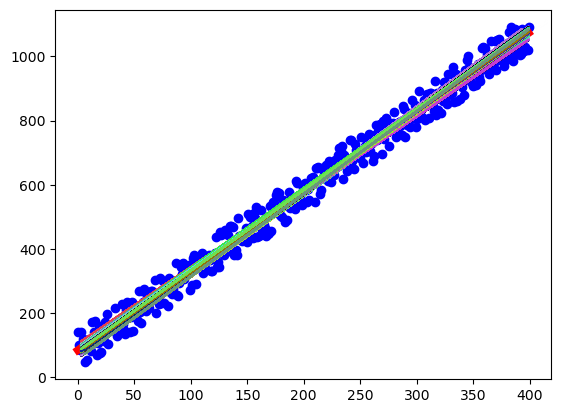

In [6]:
plt.scatter(x_1, y_vals, c ="blue")
plt.plot(x_1,X_pop*beta_hat_pop , c ="red",linewidth=5.5)

NUMBER_OF_SIMULATIONS = 1000
no_of_colors=NUMBER_OF_SIMULATIONS
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)]

beta_0_estimates = []
beta_1_estimates = []

for x in range(NUMBER_OF_SIMULATIONS):
    sample_df_temp = sample_df.sample(100,replace=True)
    x1_temp = sample_df_temp['x1'] 
    y_temp = sample_df_temp['y']
    beta_hat,X = perform_ols_regression(x1_temp,y_temp)
    predictions = X*beta_hat
    plt.plot(x1_temp, predictions, c =color[x])
    beta_0_estimates.append(beta_hat[0])
    beta_1_estimates.append(beta_hat[1])

plt.show()


In [7]:
beta_0_estimates = np.asarray(beta_0_estimates)
beta_1_estimates = np.asarray(beta_1_estimates)

In [8]:
print(beta_0_estimates.mean())
print(beta_1_estimates.mean())

78.5218992726764
2.49534786407962


In [9]:
print(f'95 confidence interval for b0: {np.percentile(beta_0_estimates,2.5),np.percentile(beta_0_estimates,97.5)}')
print(f'95 confidence interval for b1: {np.percentile(beta_1_estimates,2.5),np.percentile(beta_1_estimates,97.5)}')

95 confidence interval for b0: (63.5272978446324, 93.8683472969192)
95 confidence interval for b1: (2.43038286967596, 2.55678627773211)
